<a href="https://colab.research.google.com/github/chin0104/DPDM2023/blob/main/DPDM_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#HW1


In [ ]:
def find_max (list_ex):
  max = list_ex[0]
  for x in list_ex:
    if x > max:
      max = x
  return max

In [ ]:
def sort_max2min(list_ex):
  Ans = []
  print(list_ex)
  max = find_max(list_ex)
  Ans.append(max)
  list_ex.remove(max)
  list2 = list_ex
  print(list2)
  max = find_max(list2)
  Ans.append(max)
  list2.remove(max)
  list3 = list2
  print(list3)
  max = find_max(list3)
  Ans.append(max)
  list3.remove(max)
  list4 = list3
  print(list4)
  max = find_max(list4)
  Ans.append(max)
  list4.remove(max)
  list5 = list4
  print(list5)
  max = find_max(list5)
  Ans.append(max)
  list5.remove(max)
  list6 = list5
  print(list6)
  max = list5[0]
  Ans.append(max)
  return Ans

In [ ]:
list_ex = [1,5,9,-19,-2,0]
Ans = sort_max2min(list_ex)
print(Ans)

[1, 5, 9, -19, -2, 0]
[1, 5, -19, -2, 0]
[1, -19, -2, 0]
[-19, -2, 0]
[-19, -2]
[-19]
[9, 5, 1, 0, -2, -19]


#HW2

In [ ]:
list = [1,5,9,-19,-2,0]

In [ ]:
list.sort()

In [ ]:
def sortR(list):
  list.sort(reverse=True)
  return list

In [ ]:
list

[-19, -2, 0, 1, 5, 9]

In [ ]:
list.sort(reverse = True)

In [ ]:
list

[1, 5, 9, -19, -2, 0]

In [ ]:
sortR(list)

[9, 5, 1, 0, -2, -19]

In [ ]:
list

[9, 5, 1, 0, -2, -19]

#HW3

จำนวนเด็กที่ได้รับเงินอุดหนุนเพื่อการเลี้ยงดูเด็กแรกเกิดใน กทม. ปี 2565

number_of_register = จำนวนผู้ลงทะเบียน

number_of_eligible = จำนวนผู้มีสิทธิ

number_of_payee = จำนวนผู้ได้รับเงิน

form https://data.bangkok.go.th/dataset/soc_626208de02ea4/resource/419fec15-a47c-4e8d-a08d-fa33604263ab

In [ ]:
data = pd.read_csv('/content/10.-2565.csv')
data

,fiscal_year,district,number_of_register,number_of_eligible,number_of_payee
0,2565,คลองเตย,1677,1361,1360
1,2565,คลองสาน,823,706,706
2,2565,คลองสามวา,3972,3287,3287
3,2565,คันนายาว,1292,1049,1048
4,2565,จตุจักร,1394,1084,1082
5,2565,จอมทอง,2082,1825,1825
6,2565,ดอนเมือง,1182,988,988
7,2565,ดินแดง,1761,1412,1412
8,2565,ดุสิต,925,767,767
9,2565,ตลิ่งชัน,1054,900,897


In [ ]:
data.head()

,fiscal_year,district,number_of_register,number_of_eligible,number_of_payee
0,2565,คลองเตย,1677,1361,1360
1,2565,คลองสาน,823,706,706
2,2565,คลองสามวา,3972,3287,3287
3,2565,คันนายาว,1292,1049,1048
4,2565,จตุจักร,1394,1084,1082


In [ ]:
data.tail()

,fiscal_year,district,number_of_register,number_of_eligible,number_of_payee
45,2565,สายไหม,2117,1740,1740
46,2565,หนองแขม,2168,1870,1870
47,2565,หนองจอก,4863,4027,4026
48,2565,หลักสี่,1383,1168,1168
49,2565,ห้วยขวาง,1027,882,881


In [ ]:
data.describe()

,fiscal_year,number_of_register,number_of_eligible,number_of_payee
count,50.0,50.00000,50.00000,50.000000
mean,2565.0,1468.80000,1218.94000,1218.500000
std,0.0,975.07804,813.66762,813.608095
min,2565.0,120.00000,103.00000,103.000000
25%,2565.0,941.75000,760.25000,760.250000
50%,2565.0,1195.00000,999.50000,999.500000
75%,2565.0,1670.25000,1367.75000,1366.750000
max,2565.0,4863.00000,4027.00000,4026.000000


In [ ]:
out1 = filter(data,'number_of_register')
out1

In [ ]:
out2 = filter(data,'number_of_eligible')
out2

In [ ]:
out3 = filter(data,'number_of_payee')
out3

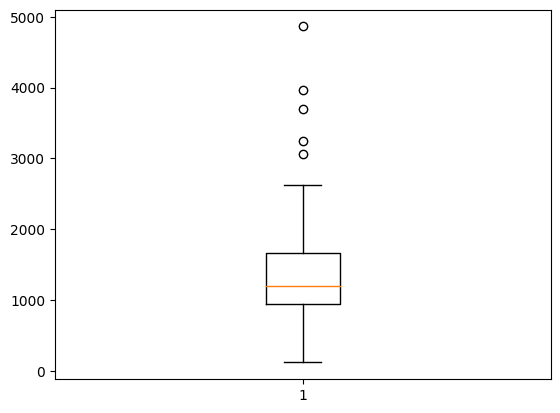

In [ ]:
bpnr = plt.boxplot(data['number_of_register'])

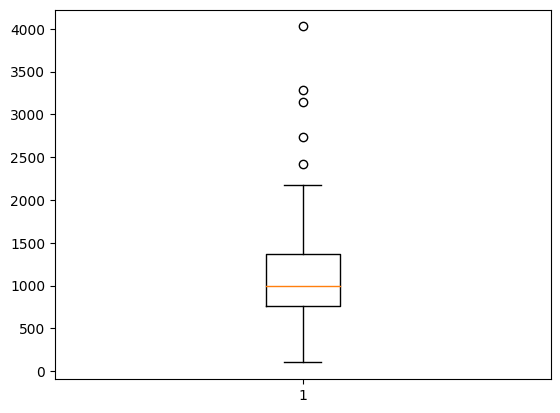

In [ ]:
bpne = plt.boxplot(data['number_of_eligible'])

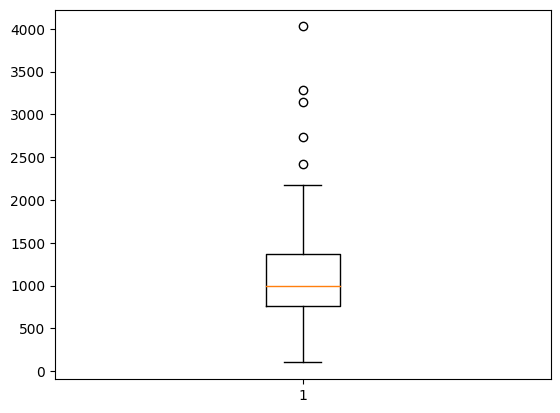

In [ ]:
bpnp = plt.boxplot(data['number_of_payee'])

In [ ]:
data1 = data[(data['number_of_register'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_register'] <= bpnr['whiskers'][0].get_ydata().max())]


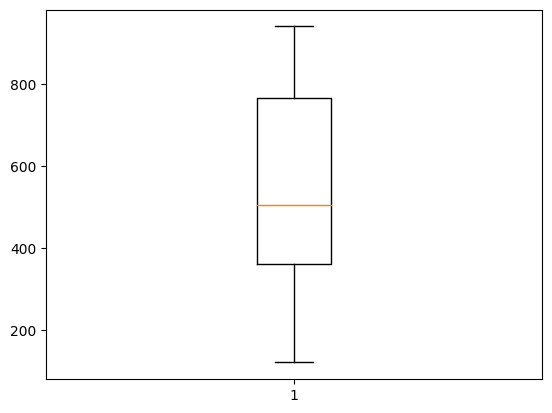

In [ ]:
olbpnr = plt.boxplot(data1['number_of_register'])

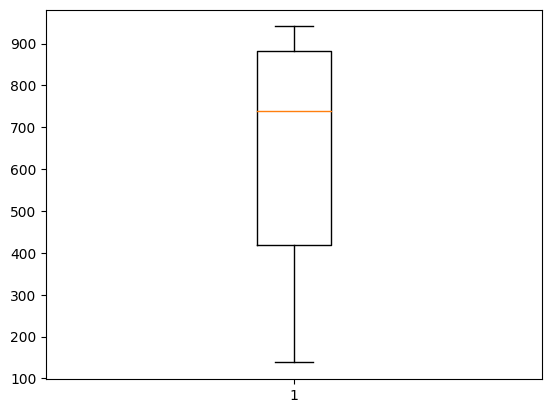

In [ ]:
data2 = data[(data['number_of_eligible'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_eligible'] <= bpnr['whiskers'][0].get_ydata().max())]
olbpne = plt.boxplot(data2['number_of_eligible'])

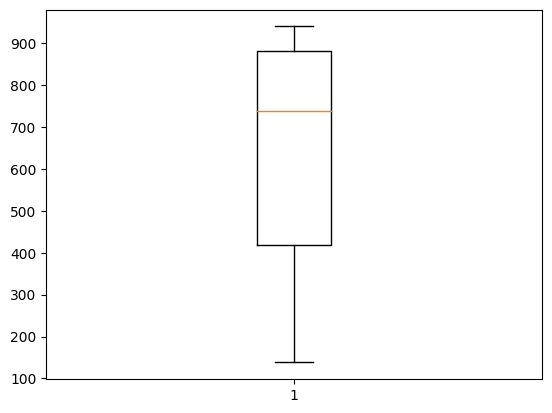

In [ ]:
data3 = data[(data['number_of_payee'] >= bpnr['whiskers'][0].get_ydata().min()) & (data['number_of_payee'] <= bpnr['whiskers'][0].get_ydata().max())]
olbpnp = plt.boxplot(data3['number_of_payee'])